In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import log_loss,accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score,GridSearchCV
import pandas_profiling

In [3]:
np.random.seed(27)
FILE_PATH="task1_data.tsv"

In [4]:
def open_data(filename=FILE_PATH):
    return pd.read_csv(filename,delimiter="\t")

In [5]:
data=open_data()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54099 entries, 0 to 54098
Columns: 204 entries, search_flags_0 to ind
dtypes: float64(105), int64(99)
memory usage: 84.2 MB


In [7]:
data.describe()

search_flags_0  search_flags_1  search_flags_2  search_flags_3  \
count    54099.000000    54099.000000    54099.000000    54099.000000   
mean         0.754007        0.244496        0.000536        0.000499   
std          0.430679        0.429792        0.023147        0.022335   
min          0.000000        0.000000        0.000000        0.000000   
25%          1.000000        0.000000        0.000000        0.000000   
50%          1.000000        0.000000        0.000000        0.000000   
75%          1.000000        0.000000        0.000000        0.000000   
max          1.000000        1.000000        1.000000        1.000000   

       search_flags_4  search_flags_5  search_flags_6  search_flags_7  \
count    54099.000000    54099.000000    54099.000000    54099.000000   
mean         0.000148        0.000055        0.000092        0.000055   
std          0.012160        0.007447        0.009613        0.007447   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          0.000000        0.000000        0.000000        0.000000   
max          1.000000        1.000000        1.000000        1.000000   

       search_flags_8  session_ip_cc_0      ...         cluster_92  \
count    54099.000000     54099.000000      ...       54099.000000   
mean         0.000111         0.994214      ...           0.939442   
std          0.010531         0.075844      ...           0.038632   
min          0.000000         0.000000      ...           0.400900   
25%          0.000000         1.000000      ...           0.927200   
50%          0.000000         1.000000      ...           0.946900   
75%          0.000000         1.000000      ...           0.963800   
max          1.000000         1.000000      ...           1.000000   

         cluster_93    cluster_94    cluster_95    cluster_96    cluster_97  \
count  54099.000000  54099.000000  54099.000000  54099.000000  54099.000000   
mean       0.935256      0.915578      0.940102      0.931167      0.957804   
std        0.040001      0.059016      0.040507      0.045640      0.035031   
min        0.457500      0.516300      0.381400      0.375100      0.553800   
25%        0.915700      0.887500      0.924000      0.916900      0.952400   
50%        0.943000      0.932700      0.949700      0.939700      0.966500   
75%        0.964600      0.957500      0.966650      0.959400      0.975900   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         cluster_98    cluster_99         click           ind  
count  54099.000000  54099.000000  54099.000000  54099.000000  
mean       0.946347      0.924926      0.427531  27049.000000  
std        0.078497      0.125651      0.494725  15617.180443  
min        0.379300      0.109700      0.000000      0.000000  
25%        0.932800      0.937100      0.000000  13524.500000  
50%        0.966000      0.965300      0.000000  27049.000000  
75%        0.990900      0.981900      1.000000  40573.500000  
max        1.000000      1.000000      1.000000  54098.000000  

[8 rows x 204 columns]

In [8]:
len(data.columns)

204

In [9]:
train_data,test_data = train_test_split(data,test_size=0.2,random_state=42)

In [10]:
print("{} train samples + {} test  samples".format(len(train_data),len(test_data)))

43279 train samples + 10820 test  samples


In [26]:
 pandas_profiling.ProfileReport(data)

In [77]:
report=pandas_profiling.ProfileReport(data)



In [88]:
rejected_variables = report.get_rejected_variables(threshold=.9)

len(rejected_variables)

40

In [78]:

data_dropped= data.copy()
data_dropped= data.drop(rejected_variables,axis=1)

In [61]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data_dropped, data_dropped["click"]):
    strat_train_set = data_dropped.loc[train_index]
    strat_test_set = data_dropped.loc[test_index]

In [62]:
corr_matrix=data_dropped.corr()

In [ ]:
corr_matrix["click"].sort_values(ascending=False)

In [64]:
trainX = strat_train_set.drop("click",axis=1)
trainY= strat_train_set["click"]
testX = strat_test_set.drop("click",axis=1)
testY = strat_test_set["click"]

In [65]:
num_features = [column for column in trainX.columns  if len(trainX[column].value_counts())>2]
cat_features = list(set(trainX.columns)-set(num_features))

In [ ]:
data[cat_features].hist(bins=10,figsize=(20,20))

In [146]:
np.var(data["2gram_boost_15"])

0.059834103337800794

In [ ]:
plt.show()

In [ ]:
data[num_features].hist(bins=20,figsize=(30,30))

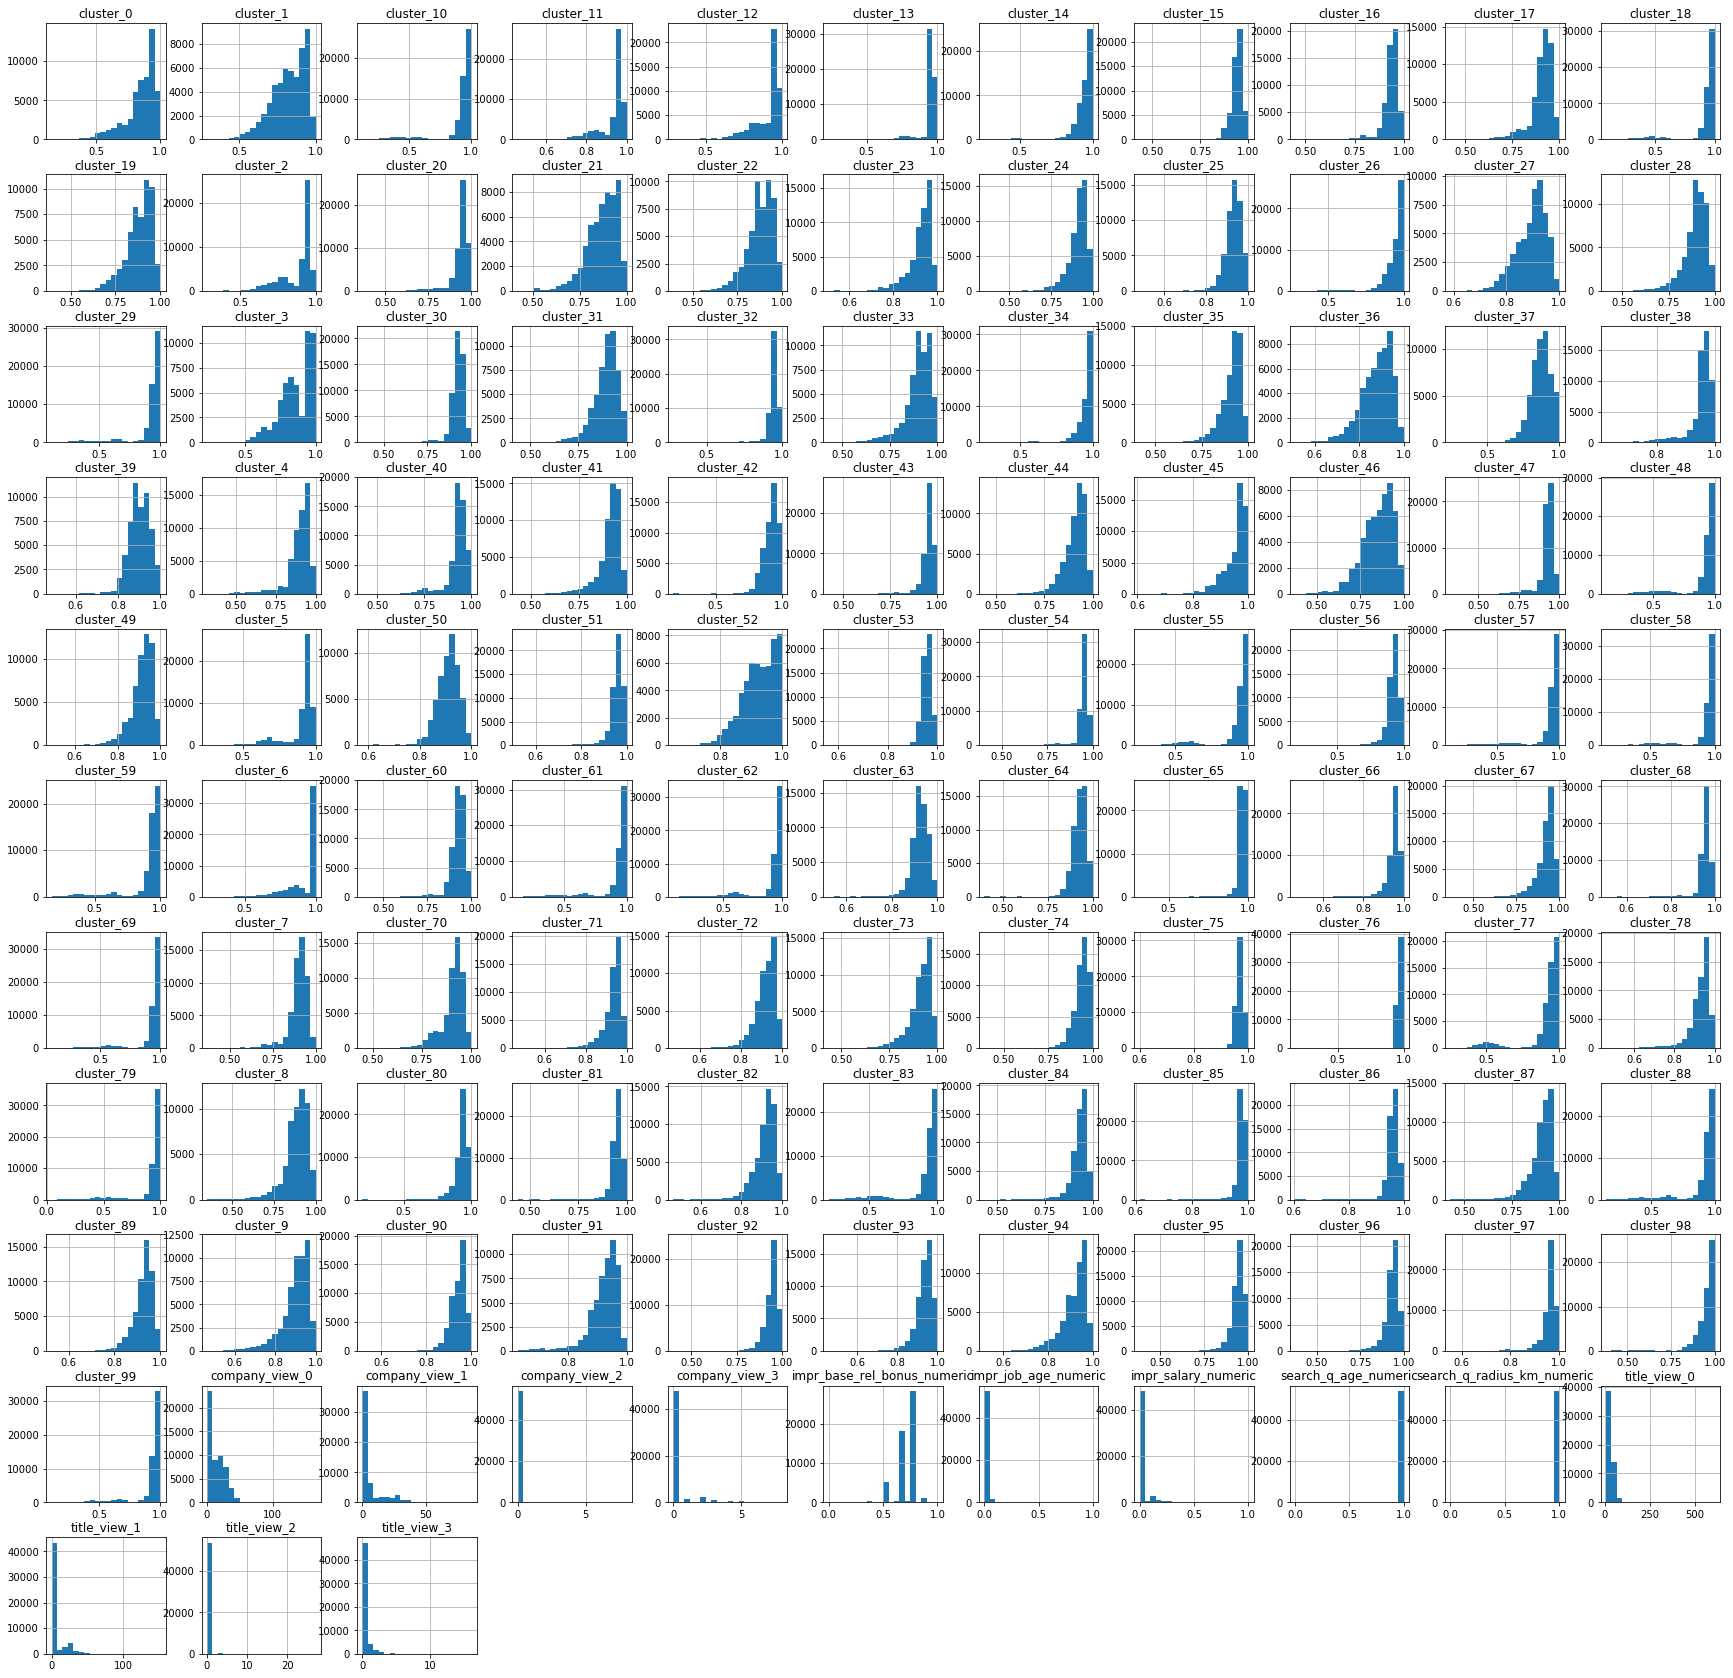

In [602]:
plt.show()

In [589]:
#Variance disctionary
var_dict=dict(data.var(axis=0))

In [15]:
'''
pca=PCA(n_components=0.95)
train_arr = pca.fit_transform(trX)
test_arr = pca.fit_transform(tsX)
'''

'pca=PCA(n_components=0.95)\ntrain_arr = pca.fit_transform(trX)\ntest_arr = pca.fit_transform(tsX)\n'

In [66]:
class VarianceFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, variance_rate=0.1):
        self.variance_rate = variance_rate
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        indecies=[i for i in range(X.shape[1]) if(np.var(X[:,i])>self.variance_rate)]  
        return X[:,indecies]
       

In [67]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
       

In [68]:
num_pipeline = Pipeline([
    ("num_selector",DataFrameSelector(num_features)),
    ('std_scaler', StandardScaler()),
    ("var_selector",VarianceFeatureSelector()),
    ('imputer', Imputer(strategy="median")),                        
])

In [69]:
cat_pipeline = Pipeline([
    ("cat_selector",DataFrameSelector(cat_features)),
    ("var_selector",VarianceFeatureSelector())
])

In [70]:
full_pipiline = FeatureUnion([
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline)
])

In [71]:
trX=full_pipiline.fit_transform(trainX)

In [72]:
tsX=full_pipiline.fit_transform(testX)

In [99]:
model = LogisticRegression()

In [101]:
model.fit(trX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
cross_val_score(model,trX,trainY,cv=5)

array([ 0.60910246,  0.60963494,  0.61229205,  0.6140959 ,  0.61571346])

In [102]:
print(model.score(tsX,testY))

0.61247689464


In [48]:
predY=model.predict(tsX)

In [76]:
print(log_loss(predY,testY))

13.3145518695


In [618]:
model.predict_proba(tsX)

array([[ 0.68526721,  0.31473279],
       [ 0.46573479,  0.53426521],
       [ 0.70881734,  0.29118266],
       ..., 
       [ 0.60428116,  0.39571884],
       [ 0.34811595,  0.65188405],
       [ 0.82116586,  0.17883414]])

In [127]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}